In [22]:
import pandas as pd
import numpy as np
from sklearn.metrics import precision_recall_curve , average_precision_score, confusion_matrix , accuracy_score , precision_score, recall_score
import matplotlib.pyplot as plt

In [2]:
df = pd.read_csv('BankCustomers.csv')
x = df.iloc[:, 3:13]
y = df.iloc[:, 13]

In [5]:
df.head()

,RowNumber,CustomerId,Surname,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited
0,1,15634602,Hargrave,619,France,Female,42,2,0.00,1,1,1,101348.88,1
1,2,15647311,Hill,608,Spain,Female,41,1,83807.86,1,0,1,112542.58,0
2,3,15619304,Onio,502,France,Female,42,8,159660.80,3,1,0,113931.57,1
3,4,15701354,Boni,699,France,Female,39,1,0.00,2,0,0,93826.63,0
4,5,15737888,Mitchell,850,Spain,Female,43,2,125510.82,1,1,1,79084.10,0


In [6]:
states = pd.get_dummies(x['Geography'] , drop_first = True)
gender = pd.get_dummies(x['Gender'] , drop_first= True)

In [8]:
x = x.drop(['Geography' , 'Gender'] , axis = 1)
x = pd.concat([x , states , gender] , axis = 1)

In [34]:
x.columns

Index(['CreditScore', 'Age', 'Tenure', 'Balance', 'NumOfProducts', 'HasCrCard',
       'IsActiveMember', 'EstimatedSalary', 'Germany', 'Spain', 'Male'],
      dtype='object')

In [12]:
from sklearn.model_selection import train_test_split
x_train , x_test , y_train , y_test = train_test_split(x , y , test_size = 0.2 , random_state = 0)

In [13]:
from sklearn.preprocessing import StandardScaler
sc = StandardScaler()
x_train = sc.fit_transform(x_train)
x_test = sc.fit_transform(x_test)

In [16]:
import keras
from keras.models import Sequential
from keras.layers import Dense

In [51]:
classifier = Sequential()

In [52]:
classifier.add(Dense(activation='relu', input_dim = 11, units=12, kernel_initializer= 'uniform'))
classifier.add(Dense(activation = 'relu', units = 8, kernel_initializer= 'uniform'))
classifier.add(Dense(activation = 'relu', units = 6, kernel_initializer= 'uniform'))
classifier.add(Dense(activation = 'relu', units = 4, kernel_initializer= 'uniform'))
classifier.add(Dense(activation = 'sigmoid', units = 1 , kernel_initializer= 'uniform'))
classifier.compile(optimizer = 'adam' , loss= 'binary_crossentropy', metrics= ['binary_accuracy'])
classifier.fit(x_train , y_train, batch_size = 10, epochs= 100 , validation_data=(x_test,y_test))

Epoch 1/100
800/800 ━━━━━━━━━━━━━━━━━━━━ 1s 382us/step - binary_accuracy: 0.7892 - loss: 0.5527 - val_binary_accuracy: 0.7975 - val_loss: 0.4280
Epoch 2/100
800/800 ━━━━━━━━━━━━━━━━━━━━ 0s 294us/step - binary_accuracy: 0.7901 - loss: 0.4325 - val_binary_accuracy: 0.7975 - val_loss: 0.4207
Epoch 3/100
800/800 ━━━━━━━━━━━━━━━━━━━━ 0s 291us/step - binary_accuracy: 0.8025 - loss: 0.4222 - val_binary_accuracy: 0.8290 - val_loss: 0.4146
Epoch 4/100
800/800 ━━━━━━━━━━━━━━━━━━━━ 0s 294us/step - binary_accuracy: 0.8169 - loss: 0.4283 - val_binary_accuracy: 0.8380 - val_loss: 0.4143
Epoch 5/100
800/800 ━━━━━━━━━━━━━━━━━━━━ 0s 293us/step - binary_accuracy: 0.8313 - loss: 0.4113 - val_binary_accuracy: 0.8370 - val_loss: 0.4099
Epoch 6/100
800/800 ━━━━━━━━━━━━━━━━━━━━ 0s 294us/step - binary_accuracy: 0.8343 - loss: 0.4117 - val_binary_accuracy: 0.8410 - val_loss: 0.4054
Epoch 7/100
800/800 ━━━━━━━━━━━━━━━━━━━━ 0s 292us/step - binary_accuracy: 0.8363 - loss: 0.4093 - val_binary_accuracy: 0.8430 - va

In [54]:
def plotLearningCurve(history,epochs):
  epochRange = range(1,epochs+1)
  plt.plot(epochRange,history.history['binary_accuracy'])
  plt.plot(epochRange,history.history['val_binary_accuracy'])
  plt.title('Model Accuracy')
  plt.xlabel('Epoch')
  plt.ylabel('Accuracy')
  plt.legend(['Train','Validation'],loc='best')
  plt.show()

  plt.plot(epochRange,history.history['loss'])
  plt.plot(epochRange,history.history['val_loss'])
  plt.title('Model Loss')
  plt.xlabel('Epoch')
  plt.ylabel('Loss')
  plt.legend(['Train','Validation'],loc='best')
  plt.show()

In [55]:
plotLearningCurve(classifier,5)

TypeError: 'History' object is not subscriptable

63/63 ━━━━━━━━━━━━━━━━━━━━ 0s 235us/step


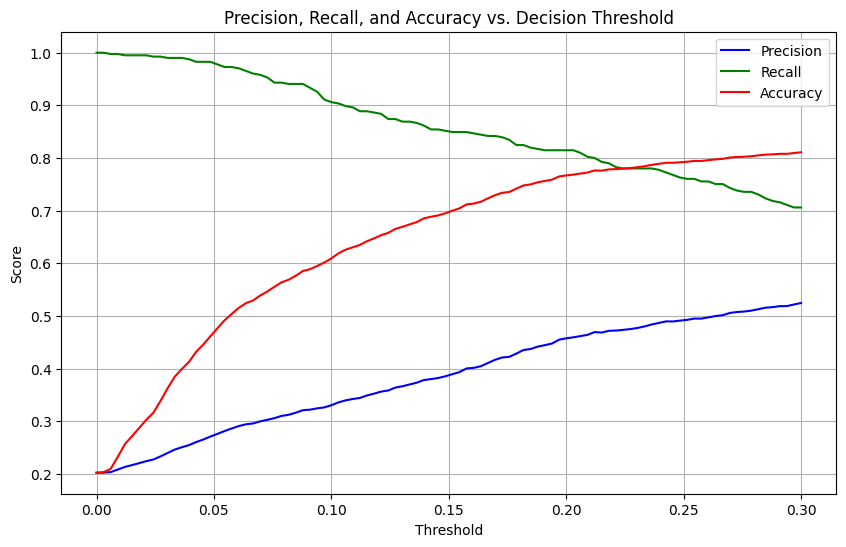

In [57]:
y_probs = classifier.predict(x_test)
thresholds = np.linspace(0, 0.3, 100)
precisions = []
recalls = []
accuracies = []


# Calculate precision, recall, and accuracy for each threshold
for threshold in thresholds:
    y_pred = (y_probs >= threshold).astype(int)
    precisions.append(precision_score(y_test, y_pred))
    recalls.append(recall_score(y_test, y_pred))
    accuracies.append(accuracy_score(y_test, y_pred))

# Plotting
plt.figure(figsize=(10, 6))
plt.plot(thresholds, precisions, label='Precision', color='blue')
plt.plot(thresholds, recalls, label='Recall', color='green')
plt.plot(thresholds, accuracies, label='Accuracy', color='red')
plt.xlabel('Threshold')
plt.ylabel('Score')
plt.title('Precision, Recall, and Accuracy vs. Decision Threshold')
plt.legend(loc='best')
plt.grid(True)
plt.show()

In [58]:
y_pred = classifier.predict(x_test)
y_pred = (y_pred > 0.20)

63/63 ━━━━━━━━━━━━━━━━━━━━ 0s 215us/step


In [59]:
from sklearn.metrics import confusion_matrix,accuracy_score
cm = confusion_matrix(y_test , y_pred)
acc = accuracy_score(y_test, y_pred)

In [60]:
print(cm)

[[1204  391]
 [  75  330]]


In [61]:
print(acc)

0.767
